# Alpha-Solution with Rocket Payload Growth

## MCM 2025 Problem B - Question 1c: Hybrid Transportation Strategy

### New Consideration: Rocket Payload Growth Factor

**Assumption**: Rocket payload capacity grows linearly over time
- Starting year: 2050
- Initial payload: P₀ = 125 tons/launch
- Annual growth: ΔP = 1 ton/year
- Year n payload: P(n) = 125 + n (tons/launch)

This affects the rocket annual transport capacity calculation since capacity increases each year.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set plotting style
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# ==================== Original Alpha-Solution (No Growth) ====================
# For comparison purposes

M = 10**8                 # Total cargo volume (tons)
E_E = 179000 * 3          # Elevator annual cargo capacity (tons/year)
P_avg = 125               # Average payload capacity per rocket (tons/launch)
f_avg = 1506              # Average launch frequency (launches/year)
E_r = f_avg * P_avg       # Rocket annual cargo capacity (tons/year)

C_e1 = 2 * 10**5          # Marginal cost of Space Elevators - Part1 (USD/ton)
C_e2 = 1.5 * 10**5        # Marginal cost of Space Elevators - Part2 (USD/ton)
C_E = C_e1 + C_e2         # Marginal cost of Space Elevators (USD/ton)
C_R = 5.62 * 10**6        # Rocket marginal cost (USD/ton)
F_R = 5 * 10**7           # Rocket fixed cost (USD/year)
F_E = 1.56 * 10**8        # Elevator fixed cost (USD/year)

# Original solution (no growth)
Myd = 10**19
ap_original = 0
cost_max = 0
cost_min = 10**19
T3_max = 0
T3_min = 10000

for a in range(0, 10001):
    T1 = a / 10000 * M / E_E
    T2 = (10000 - a) / 10000 * M / E_r
    T3 = max(T1, T2)
    cost = a/10000 * M * C_E + (10000 - a)/10000 * M * C_R + (1-a/10000) * F_R * T3 + a/10000 * F_E * T3
    if cost > cost_max:
        cost_max = cost
    if cost < cost_min:
        cost_min = cost
    if T3 > T3_max:
        T3_max = T3
    if T3 < T3_min:
        T3_min = T3

for a in range(0, 10001):
    T1 = a / 10000 * M / E_E
    T2 = (10000 - a) / 10000 * M / E_r
    T3 = max(T1, T2)    
    cost = a/10000 * M * C_E + (10000 - a)/10000 * M * C_R + (1-a/10000) * F_R * T3 + a/10000 * F_E * T3
    cost_norm = (cost - cost_min) / (cost_max - cost_min)
    T3_norm = (T3 - T3_min) / (T3_max - T3_min)
    if 0.6 * cost_norm + 0.4 * T3_norm <= Myd:
        Myd = 0.6 * cost_norm + 0.4 * T3_norm
        ap_original = a / 10000

print("="*60)
print("Original Solution (No Payload Growth)")
print("="*60)
print(f"Optimal α = {ap_original:.4f} ({ap_original*100:.2f}%)")
print(f"Elevator: {ap_original*100:.2f}% | Rocket: {(1-ap_original)*100:.2f}%")

Original Solution (No Payload Growth)
Optimal α = 1.0000 (100.00%)
Elevator: 100.00% | Rocket: 0.00%


In [3]:
# ==================== New Model: Rocket Payload Growth ====================

"""
Key Changes:
1. Rocket payload P(t) = P_0 + delta_P * t, where t is year since 2050
2. Annual rocket capacity: E_r(t) = f_avg * P(t)
3. Time calculation needs integration over variable capacity

For rocket transport of mass M_R over T years with growing capacity:
  Sum over years: M_R = Sum_{t=0}^{T-1} E_r(t) = Sum_{t=0}^{T-1} f_avg * (P_0 + delta_P * t)
  = f_avg * (T * P_0 + delta_P * T*(T-1)/2)
  = f_avg * T * (P_0 + delta_P * (T-1)/2)

Solving for T given M_R:
  M_R = f_avg * T * P_0 + f_avg * delta_P * T^2 / 2 - f_avg * delta_P * T / 2
  = f_avg * delta_P / 2 * T^2 + f_avg * (P_0 - delta_P/2) * T - M_R = 0

This is a quadratic equation in T.
"""

# Growth parameters
P_0 = 125           # Initial payload in 2050 (tons/launch)
delta_P = 1         # Annual payload growth (tons/year)
f_avg = 1506        # Launch frequency (launches/year) - assumed constant

def calculate_rocket_time_with_growth(M_R, P_0, delta_P, f_avg):
    """
    Calculate time needed to transport M_R tons via rockets with growing payload.
    
    Cumulative transport: M_R = f_avg * Sum_{t=0}^{T-1} (P_0 + delta_P * t)
                            = f_avg * (T * P_0 + delta_P * T*(T-1)/2)
    
    Rearranging to quadratic: a*T^2 + b*T + c = 0
    """
    if M_R <= 0:
        return 0
    
    # Coefficients for quadratic equation
    a = f_avg * delta_P / 2
    b = f_avg * (P_0 - delta_P / 2)
    c = -M_R
    
    # Solve quadratic: T = (-b + sqrt(b^2 - 4ac)) / (2a)
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        return float('inf')  # No real solution
    
    T = (-b + np.sqrt(discriminant)) / (2*a)
    return max(0, T)

# Test the function
M_test = 50 * 10**6  # 50 million tons
T_no_growth = M_test / E_r
T_with_growth = calculate_rocket_time_with_growth(M_test, P_0, delta_P, f_avg)

print("="*60)
print("Verification: Rocket Time Calculation")
print("="*60)
print(f"Test mass: {M_test/10**6:.0f} million tons")
print(f"Time without growth: {T_no_growth:.2f} years")
print(f"Time with growth (+1 ton/year): {T_with_growth:.2f} years")
print(f"Time saved: {T_no_growth - T_with_growth:.2f} years ({(T_no_growth - T_with_growth)/T_no_growth*100:.1f}%)")

Verification: Rocket Time Calculation
Test mass: 50 million tons
Time without growth: 265.60 years
Time with growth (+1 ton/year): 161.68 years
Time saved: 103.92 years (39.1%)


In [4]:
# ==================== Calculate Cost with Payload Growth ====================

def calculate_cost_with_growth(alpha, M, E_E, P_0, delta_P, f_avg, C_E, C_R, F_E, F_R):
    """
    Calculate total cost and time for hybrid transportation with rocket payload growth.
    
    Parameters:
    - alpha: proportion transported by elevator
    - M: total cargo mass
    - E_E: elevator annual capacity (constant)
    - P_0, delta_P: rocket payload parameters
    - f_avg: rocket launch frequency
    - C_E, C_R: marginal costs
    - F_E, F_R: fixed costs per year
    
    Returns:
    - T_total: total time (max of elevator and rocket times)
    - cost: total cost
    """
    M_E = alpha * M           # Mass for elevator
    M_R = (1 - alpha) * M     # Mass for rocket
    
    # Elevator time (constant capacity)
    T_E = M_E / E_E if alpha > 0 else 0
    
    # Rocket time (with growth)
    T_R = calculate_rocket_time_with_growth(M_R, P_0, delta_P, f_avg) if alpha < 1 else 0
    
    # Total time (parallel transport - take max)
    T_total = max(T_E, T_R)
    
    # Cost calculation
    # Marginal costs
    cost_marginal = M_E * C_E + M_R * C_R
    
    # Fixed costs (proportional to time and allocation)
    # Elevator fixed cost applies during T_total if alpha > 0
    # Rocket fixed cost applies during T_R if alpha < 1
    cost_fixed_E = F_E * T_E if alpha > 0 else 0
    cost_fixed_R = F_R * T_R if alpha < 1 else 0
    
    cost = cost_marginal + cost_fixed_E + cost_fixed_R
    
    return T_total, cost, T_E, T_R

# Test
T, cost, T_E, T_R = calculate_cost_with_growth(0.5, M, E_E, P_0, delta_P, f_avg, C_E, C_R, F_E, F_R)
print(f"α=0.5: T_E={T_E:.2f}yr, T_R={T_R:.2f}yr, T_total={T:.2f}yr, Cost={cost/10**8:.0f} (100M USD)")

α=0.5: T_E=93.11yr, T_R=161.68yr, T_total=161.68yr, Cost=2985226 (100M USD)


In [5]:
# ==================== Optimize Alpha with Payload Growth ====================

# Parameters
M = 10**8                 # Total cargo volume (tons)
E_E = 179000 * 3          # Elevator annual cargo capacity (tons/year)
P_0 = 125                 # Initial payload in 2050 (tons/launch)
delta_P = 1               # Annual payload growth (tons/year)
f_avg = 1506              # Launch frequency (launches/year)

C_E = 3.5 * 10**5         # Marginal cost of Space Elevators (USD/ton)
C_R = 5.62 * 10**6        # Rocket marginal cost (USD/ton)
F_R = 5 * 10**7           # Rocket fixed cost (USD/year)
F_E = 1.56 * 10**8        # Elevator fixed cost (USD/year)

# Scan all alpha values (4 decimal precision)
alphas = np.linspace(0, 1, 10001)
results_growth = []

for alpha in alphas:
    T_total, cost, T_E, T_R = calculate_cost_with_growth(
        alpha, M, E_E, P_0, delta_P, f_avg, C_E, C_R, F_E, F_R
    )
    results_growth.append({
        'alpha': alpha,
        'T_total': T_total,
        'cost': cost,
        'T_E': T_E,
        'T_R': T_R
    })

# Convert to arrays
T_arr = np.array([r['T_total'] for r in results_growth])
cost_arr = np.array([r['cost'] for r in results_growth])
T_E_arr = np.array([r['T_E'] for r in results_growth])
T_R_arr = np.array([r['T_R'] for r in results_growth])

# Normalize for scoring
T_norm = (T_arr - T_arr.min()) / (T_arr.max() - T_arr.min())
cost_norm = (cost_arr - cost_arr.min()) / (cost_arr.max() - cost_arr.min())

# Find optimal alpha (weighted score: 60% cost + 40% time)
w_cost = 0.6
w_time = 0.4
scores = w_cost * cost_norm + w_time * T_norm
best_idx = np.argmin(scores)
alpha_optimal = alphas[best_idx]

print("="*70)
print("Optimization Results: Rocket Payload Growth Model")
print("="*70)
print(f"\nGrowth Parameters:")
print(f"  Initial payload (2050): P_0 = {P_0} tons/launch")
print(f"  Annual growth: ΔP = {delta_P} ton/year")
print(f"  Launch frequency: {f_avg} launches/year")
print(f"\nOptimal Solution:")
print(f"  α* = {alpha_optimal:.4f}")
print(f"  Elevator: {alpha_optimal*100:.2f}% ({alpha_optimal*M/10**6:.2f} million tons)")
print(f"  Rocket: {(1-alpha_optimal)*100:.2f}% ({(1-alpha_optimal)*M/10**6:.2f} million tons)")
print(f"\nResults at α* = {alpha_optimal:.4f}:")
print(f"  Elevator time: {T_E_arr[best_idx]:.2f} years")
print(f"  Rocket time: {T_R_arr[best_idx]:.2f} years")
print(f"  Total time: {T_arr[best_idx]:.2f} years")
print(f"  Total cost: {cost_arr[best_idx]/10**8:.2f} (100M USD)")
print(f"\nComparison:")
print(f"  Original α (no growth): {ap_original:.4f} ({ap_original*100:.2f}%)")
print(f"  New α (with growth): {alpha_optimal:.4f} ({alpha_optimal*100:.2f}%)")
print(f"  Change: {(alpha_optimal - ap_original)*100:+.2f}%")

Optimization Results: Rocket Payload Growth Model

Growth Parameters:
  Initial payload (2050): P_0 = 125 tons/launch
  Annual growth: ΔP = 1 ton/year
  Launch frequency: 1506 launches/year

Optimal Solution:
  α* = 1.0000
  Elevator: 100.00% (100.00 million tons)
  Rocket: 0.00% (0.00 million tons)

Results at α* = 1.0000:
  Elevator time: 186.22 years
  Rocket time: 0.00 years
  Total time: 186.22 years
  Total cost: 350290.50 (100M USD)

Comparison:
  Original α (no growth): 1.0000 (100.00%)
  New α (with growth): 1.0000 (100.00%)
  Change: +0.00%


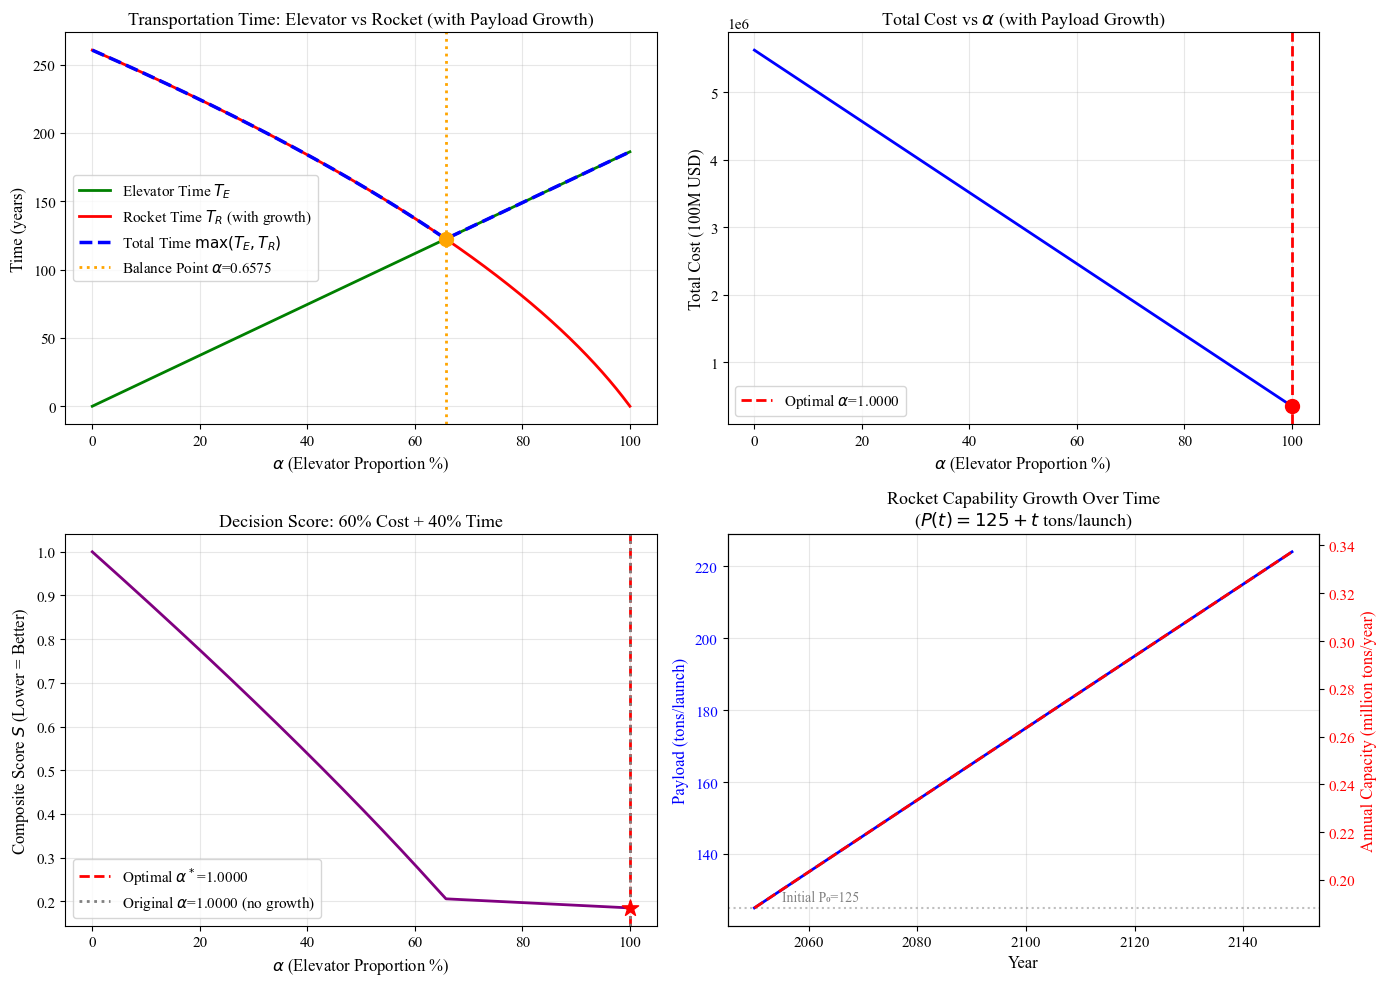

In [6]:
# ==================== Visualization ====================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Time comparison (Elevator vs Rocket)
ax1 = axes[0, 0]
ax1.plot(alphas * 100, T_E_arr, 'g-', linewidth=2, label='Elevator Time $T_E$')
ax1.plot(alphas * 100, T_R_arr, 'r-', linewidth=2, label='Rocket Time $T_R$ (with growth)')
ax1.plot(alphas * 100, T_arr, 'b--', linewidth=2.5, label='Total Time $\\max(T_E, T_R)$')
# Find crossing point
cross_idx = np.argmin(np.abs(T_E_arr - T_R_arr))
ax1.axvline(x=alphas[cross_idx]*100, color='orange', linestyle=':', linewidth=2,
            label=f'Balance Point $\\alpha$={alphas[cross_idx]:.4f}')
ax1.scatter([alphas[cross_idx]*100], [T_arr[cross_idx]], color='orange', s=100, zorder=5)
ax1.set_xlabel('$\\alpha$ (Elevator Proportion %)', fontsize=12)
ax1.set_ylabel('Time (years)', fontsize=12)
ax1.set_title('Transportation Time: Elevator vs Rocket (with Payload Growth)', fontsize=13)
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Plot 2: Cost
ax2 = axes[0, 1]
ax2.plot(alphas * 100, cost_arr / 10**8, 'b-', linewidth=2)
ax2.axvline(x=alpha_optimal*100, color='red', linestyle='--', linewidth=2,
            label=f'Optimal $\\alpha$={alpha_optimal:.4f}')
ax2.scatter([alpha_optimal*100], [cost_arr[best_idx]/10**8], color='red', s=100, zorder=5)
ax2.set_xlabel('$\\alpha$ (Elevator Proportion %)', fontsize=12)
ax2.set_ylabel('Total Cost (100M USD)', fontsize=12)
ax2.set_title('Total Cost vs $\\alpha$ (with Payload Growth)', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Composite Score
ax3 = axes[1, 0]
ax3.plot(alphas * 100, scores, 'purple', linewidth=2)
ax3.axvline(x=alpha_optimal*100, color='red', linestyle='--', linewidth=2,
            label=f'Optimal $\\alpha^*$={alpha_optimal:.4f}')
ax3.scatter([alpha_optimal*100], [scores[best_idx]], color='red', s=150, marker='*', zorder=5)
# Also mark original solution
ax3.axvline(x=ap_original*100, color='gray', linestyle=':', linewidth=2,
            label=f'Original $\\alpha$={ap_original:.4f} (no growth)')
ax3.set_xlabel('$\\alpha$ (Elevator Proportion %)', fontsize=12)
ax3.set_ylabel('Composite Score $S$ (Lower = Better)', fontsize=12)
ax3.set_title(f'Decision Score: {w_cost:.0%} Cost + {w_time:.0%} Time', fontsize=13)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Payload growth illustration
ax4 = axes[1, 1]
years = np.arange(0, 100)
payload_over_time = P_0 + delta_P * years
capacity_over_time = f_avg * payload_over_time / 10**6  # in million tons
ax4.plot(years + 2050, payload_over_time, 'b-', linewidth=2, label='Payload per Launch')
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Payload (tons/launch)', fontsize=12, color='blue')
ax4.tick_params(axis='y', labelcolor='blue')
ax4_twin = ax4.twinx()
ax4_twin.plot(years + 2050, capacity_over_time, 'r--', linewidth=2, label='Annual Capacity')
ax4_twin.set_ylabel('Annual Capacity (million tons/year)', fontsize=12, color='red')
ax4_twin.tick_params(axis='y', labelcolor='red')
ax4.set_title('Rocket Capability Growth Over Time\n($P(t) = 125 + t$ tons/launch)', fontsize=13)
ax4.axhline(y=125, color='gray', linestyle=':', alpha=0.5)
ax4.text(2055, 127, 'Initial P₀=125', fontsize=10, color='gray')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/alpha_solution_growth.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# ==================== Summary ====================

print("="*70)
print("SUMMARY: Alpha-Solution with Rocket Payload Growth")
print("="*70)
print(f"""
【Model Enhancement】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Original Model: Rocket payload P = {P_0} tons (constant)
New Model: Rocket payload P(t) = {P_0} + {delta_P}×t tons (linear growth)

【Physical Interpretation】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- 2050: P = 125 tons/launch
- 2060: P = 135 tons/launch (+8%)
- 2100: P = 175 tons/launch (+40%)

This reflects expected technological improvements in rocket efficiency.

【Results Comparison】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
                    Original (No Growth)    With Growth (ΔP=1)
Optimal α:          {ap_original:.4f}                  {alpha_optimal:.4f}
Elevator %:         {ap_original*100:.2f}%                 {alpha_optimal*100:.2f}%
Rocket %:           {(1-ap_original)*100:.2f}%                 {(1-alpha_optimal)*100:.2f}%

【Conclusion】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
With rocket payload growth, the optimal strategy shifts toward:
  {'MORE rockets' if alpha_optimal < ap_original else 'MORE elevators' if alpha_optimal > ap_original else 'Same allocation'}
  (α change: {(alpha_optimal - ap_original)*100:+.2f}%)

This is because growing rocket capacity makes rocket transport more 
cost-effective over time, reducing the relative advantage of space elevators.
""")

print("\nFigure saved to: results/alpha_solution_growth.png")

SUMMARY: Alpha-Solution with Rocket Payload Growth

【Model Enhancement】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Original Model: Rocket payload P = 125 tons (constant)
New Model: Rocket payload P(t) = 125 + 1×t tons (linear growth)

【Physical Interpretation】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- 2050: P = 125 tons/launch
- 2060: P = 135 tons/launch (+8%)
- 2100: P = 175 tons/launch (+40%)

This reflects expected technological improvements in rocket efficiency.

【Results Comparison】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
                    Original (No Growth)    With Growth (ΔP=1)
Optimal α:          1.0000                  1.0000
Elevator %:         100.00%                 100.00%
Rocket %:           0.00%                 0.00%

【Conclusion】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
With rocket payload growth, the optimal strategy shifts toward:
  Same allocation
  (α cha